In [1]:
import pandas as pd
import random
import numpy
from IPython.display import HTML
from matplotlib import pylab
from matplotlib import pyplot as plt
from IPython.display import Image



In [24]:
%run lecture14.py

<h2>Classification and Statistical Sins </h2>
    
From previous lecture let's look at the Accuracy, Sensitivity, Specificity with KNN = 3, Logistic Regression with p = 0.5.

<li> C1, C2, C3 are classes are dependant, only one of those will be a 1 for each passenger.
<li> Since C1 + C2 + C3 = 1, classes are dependant.
<li> Class Passenger method edited by eliminating class 1.
   
    

In [14]:
# Look at weights
trainingSet, testSet = split80_20(examples)
model = buildModel(trainingSet, True)

#Look at changing prob
random.seed(0)
trainingSet, testSet = split80_20(examples)
model = buildModel(trainingSet, False)
print('Try p = 0.1')
truePos, falsePos, trueNeg, falseNeg =\
                  applyModel(model, testSet, 'Survived', 0.1)
getStats(truePos, falsePos, trueNeg, falseNeg)
print('Try p = 0.9')
truePos, falsePos, trueNeg, falseNeg =\
                  applyModel(model, testSet, 'Survived', 0.9)
getStats(truePos, falsePos, trueNeg, falseNeg)


model.classes_ = ['Died' 'Survived']
For label Survived
    C2 = -1.038038086122477
    C3 = -2.1511293996204897
    age = -0.033724133684728
    male gender = -2.421829377718273
Try p = 0.1
 Accuracy = 0.493
 Sensitivity = 0.976
 Specificity = 0.161
 Pos. Pred. Val. = 0.444
Try p = 0.9
 Accuracy = 0.656
 Sensitivity = 0.176
 Specificity = 0.984
 Pos. Pred. Val. = 0.882


(0.6555023923444976,
 0.17647058823529413,
 0.9838709677419355,
 0.8823529411764706)

<li> The weights for 2 classes change drastically. This demonstrates that correlated features need to be chaked and accounted for,



<h2> Changing the cut-off for logistinc regression

In [9]:
#Look at changing prob


# More important to not miss survivers: p = 0.1

random.seed(0)
trainingSet, testSet = split80_20(examples)
model = buildModel(trainingSet, False)
print('Try p = 0.1')
truePos, falsePos, trueNeg, falseNeg =\
                  applyModel(model, testSet, 'Survived', 0.1)
getStats(truePos, falsePos, trueNeg, falseNeg)
print('Try p = 0.9')
truePos, falsePos, trueNeg, falseNeg =\
                  applyModel(model, testSet, 'Survived', 0.9)
getStats(truePos, falsePos, trueNeg, falseNeg)


model.classes_ = ['Died' 'Survived']
For label Survived
    C2 = -1.038038086122477
    C3 = -2.1511293996204897
    age = -0.033724133684728
    male gender = -2.421829377718273
Try p = 0.1
 Accuracy = 0.493
 Sensitivity = 0.976
 Specificity = 0.161
 Pos. Pred. Val. = 0.444
Try p = 0.9
 Accuracy = 0.656
 Sensitivity = 0.176
 Specificity = 0.984
 Pos. Pred. Val. = 0.882


(0.6555023923444976,
 0.17647058823529413,
 0.9838709677419355,
 0.8823529411764706)

<li> Specificity: If we predict survivers, they probabiliy did. 
<li> Sensitivity: for most survivors, we predicted they died.
    
If we want to advice insurance company about who to insure, increasing p ensures, policy is awarded to predicted survivers, most of whom really survived. The upshot is though, very less policies alotted.
    


<h2> Reciever Operating Curve </h2>
    

Sensitivity vs 1-Specificity

In [18]:
def buildROC(trainingSet, testSet, title, plot = True):
    model = buildModel(trainingSet, True)
    xVals, yVals = [], []
    p = 0.0
    while p <= 1.0:
        truePos, falsePos, trueNeg, falseNeg =\
                               applyModel(model, testSet,
                               'Survived', p)
        xVals.append(1.0 - specificity(trueNeg, falsePos))
        yVals.append(sensitivity(truePos, falseNeg))
        p += 0.01
    auroc = sklearn.metrics.auc(xVals, yVals, True)
    if plot:
        pylab.plot(xVals, yVals)
        pylab.plot([0,1], [0,1])
        title = title + '\nAUROC = ' + str(round(auroc,3))
        pylab.title(title)
        pylab.xlabel('1 - specificity')
        pylab.ylabel('Sensitivity')
    return auroc



model.classes_ = ['Died' 'Survived']
For label Survived
    C2 = -1.3714731011951224
    C3 = -2.2428284865863715
    age = -0.03746028761976199
    male gender = -2.287702791304258


0.860246679316888

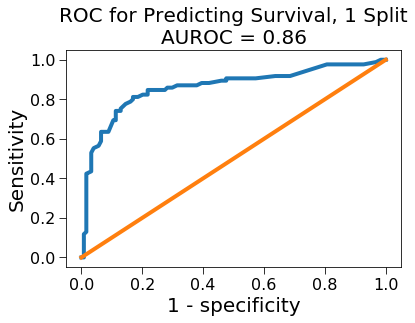

In [26]:
random.seed(0)
trainingSet, testSet = split80_20(examples)
buildROC(trainingSet, testSet, 'ROC for Predicting Survival, 1 Split')

<li> The reason for plotting Sensitivity vs 1-Specificity instead of Specificity is that we can calculate Area Under the Curve. 